# Decision Tree

#### Decision Tree
- 특정 변수에 대한 의사결정 규칙을 나무 가지가 뻗는 형태로 분류
- **분류**, **회귀** 모두에 사용
    - 분류 -> 불순도(비용함수)  회귀 -> MSE(비용함수)
- 전처리 영향도가 크지 않음
- 분석 과정을 실제 눈으로 확인 가능 -> 화이트박스 모델
- 스무고개처럼 **의미 있는 질문**을 먼저 하는 것이 중요
-> **과적합**으로 모델 성능이 떨어지기 쉬움
-> **트리 깊이를 제한**(=가지치기)하는 튜닝 필요

<div style="text-align:center">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Decision%20Tree1.png?raw=true">
</div>

#### 용어
- Root : 전체 자료를 갖는 시작 마디
- Terminal : 자식 마디가 없는 마디(=Leaf)
- Depth : 뿌리 마디로부터 끝 마디까지 연결된 마디 개수(위 그림은 3)

#### 불순도(Impurity)
- 순도가 높음 = 분류가 잘 된 것
- 불순도가 높은 = 분류가 잘 되지 않은 것
- 불순도를 수치화하는 지표
    - 지니 불순도(Gini Impurity)
    - 엔트로피(Entropy)

#### 지니 불순도(Gini Impurity)
- 지니 불순도 = 1 - $ (양성 클래스 비율^2 + 음성 클래스 비율^2) $
$$ Gini = 1 - \sum_{i=1}^{c}(p_i)^2 $$
- 분류 후에 얼마나 잘 분류했는지 평가하는 지표
- 특징
    - 지니 불순도가 낮을수록 순도 높음
    - 이진 분류의 경우 값은 0 ~ 0.5 사이의 값
        - 순수하게 분류 -> 0
        - 완벽하게 섞임 -> 0.5
- 지니 불순도 낮은 속성으로 의사결정 트리 노드 결정

<div style="text-aling:center;">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Decision%20Tree2.jpg?raw=true">
</div>

#### 엔트로피(Entropy)
- $ 엔트로피 = -음성클래스비율\times log_2(음성클래스비율) - 양성클래스비율 \times log_2(양성클래스비율) $
$$ Entropy = - \sum_{i=1}^{m}p_ilog_2p_i $$
- $ p_i $: 집합 안에서 속성 i의 확률을 나타냄
- 엔트로피는 0 ~ 1 사이 값
    - 순수하게 분류 -> 0
    - 완벽하게 섞이면 -> 1

#### 정보이득(Information Gain)
- 엔트로피는 단지 속성의 불순도 표현
- 우리가 알고 싶은 것 = 어떤 속성이 얼마나 많은 정보를 제공하나
- 정보 이득 공식
    $$ Gain(T, X) = Entropy(T) - Entropy(T, X) $$
- 정보 이득 큼 = 어떤 속성으로 분할할 때 불순도 줄어든다
- 모든 속성에 대해 분할한 후 정보 이득 계산
- 정보 이득 가장 큰 속성부터 분할

#### 가지치기
- 가지치기를 하지 않으면 모델이 overfitting 될 수 있음
- 여러 하이퍼파라미터를 조절해 가지치기 진행
    - max_depth, min_samples_leaf, min_samples_split 등
- 학습 데이터에 대한 성능은 낮아짐, 평가데이터에 대한 성능 높아짐

**주요 하이퍼파라미터**
- max_depth
    - 트리의 최대 깊이(default: None)
    - 적절한 값 설정 필요
- min_samples_split
    - 노드를 분할하기 위한 최소한의 샘플 개수(default:2)
    - 값이 작을수록 계속 분할 -> 트리 깊이 깊어져 overfitting 가능성
    - 적절한 값 필요
- min_samples_leaf
    - leaf 노드가 되기 위한 최소한의 샘플 수(default: 1)
    - 불균형 클래스인 경우 이를 고려해 작은 값 설정 필요
- max_feature
    - 최선의 분할을 위해 고려할 Feature 수
- max_leaf_node
    - leaf 노드 최대 개수

#### export_graphviz로 시각화

In [ ]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image
model = 1
# 이미지 파일 만들기
export_graphviz(model,
                feature_names=list(x),
                class_names=y.unique(),
                rounded=True,
                precision=3,
                out_file='tree.dot',
                filled=True)
!dot tree.dot -Tpng -otree.png -Gdpi=300

# 이미지 파일 로딩
Image(filename='tree.png', width=600)

#### 변수 중요도 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 중요도 시각화
plt.figure(figsize=(6, 8))
sns.barplot(y=list(x), x=model.feature_importances_)
plt.show()

#### 실습

- Titanic 데이터로 모델링
- target : Survived

**1. 환경 준비**

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv'
data = pd.read_csv(path)

**2. 데이터 이해**

In [3]:
# 상위 5개 행 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 하위 5개 행 확인
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# 기초통계량 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Survived 확인
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# Nan 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

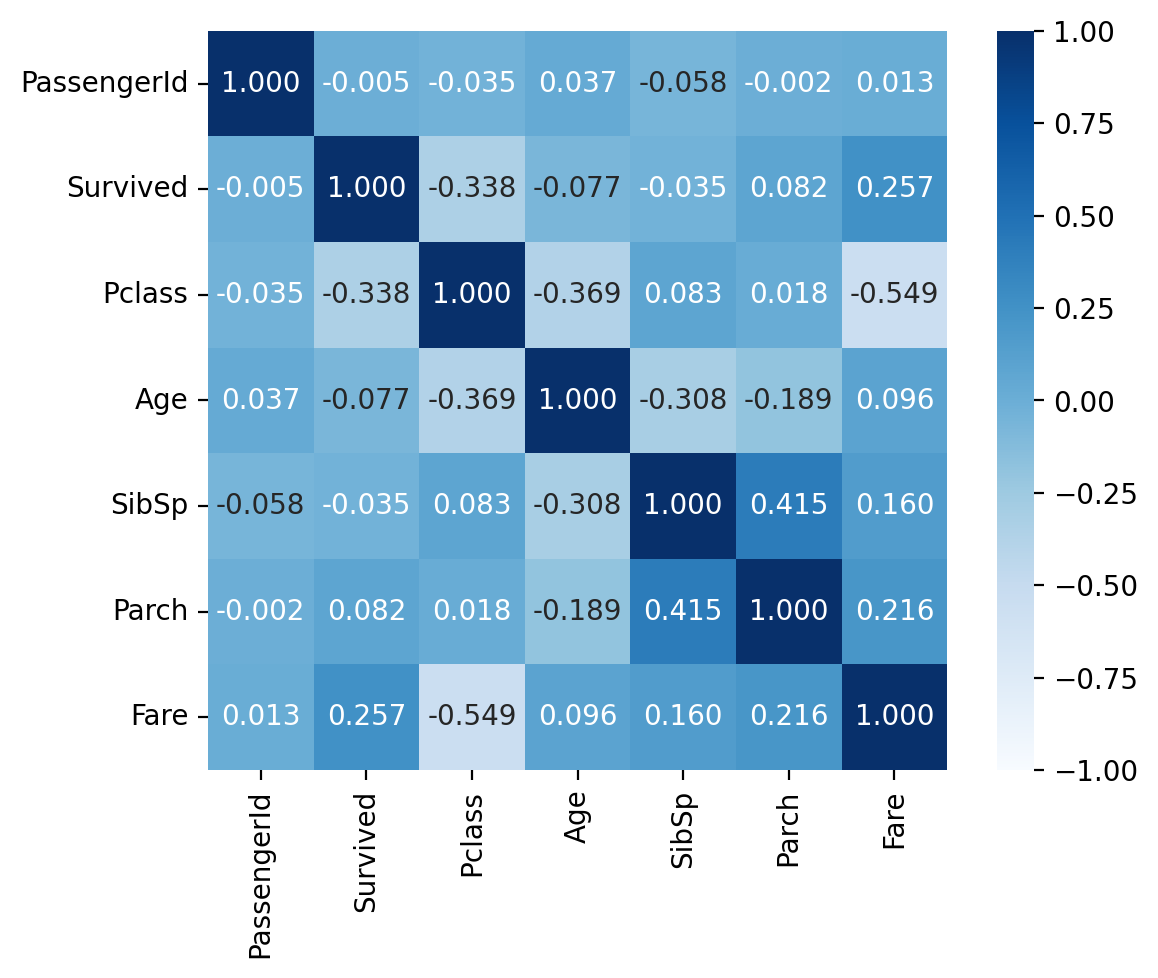

In [8]:
# 상관관계 heatmap으로 표현
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

**3. 데이터 준비**

**1) 변수 제거**

In [12]:
# 제거 대상 : PassengerId, Name, Ticket, Cabin(너무 많은 Nan)
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# drop
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**2) 결측치 처리**

In [13]:
# Age 결측치를 중앙값으로 채우기
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

In [14]:
# Embarked 최빈값으로 채우기
emb_freq = data['Embarked'].mode()[0]
data['Embarked'].fillna(emb_freq, inplace=True)

**3) x, y 분리**

In [15]:
# target 확인
target = 'Survived'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**4) 가변수화**

In [16]:
# 가변수화 대상 : Pclass, Sex, Embarked
dumm_cols = ['Pclass', 'Sex', 'Embarked']

# 가변수화
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


**5) train, test 데이터 분리**

In [17]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4. 모델링**

In [18]:
# 1. 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
# 2. 선언하기
model = DecisionTreeClassifier()

In [20]:
# 3. 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [22]:
# 5. 평가하기
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[127  26]
 [ 42  73]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       153
           1       0.74      0.63      0.68       115

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.74       268
weighted avg       0.75      0.75      0.74       268



**5. 기타**

*1) 트리 시각화*

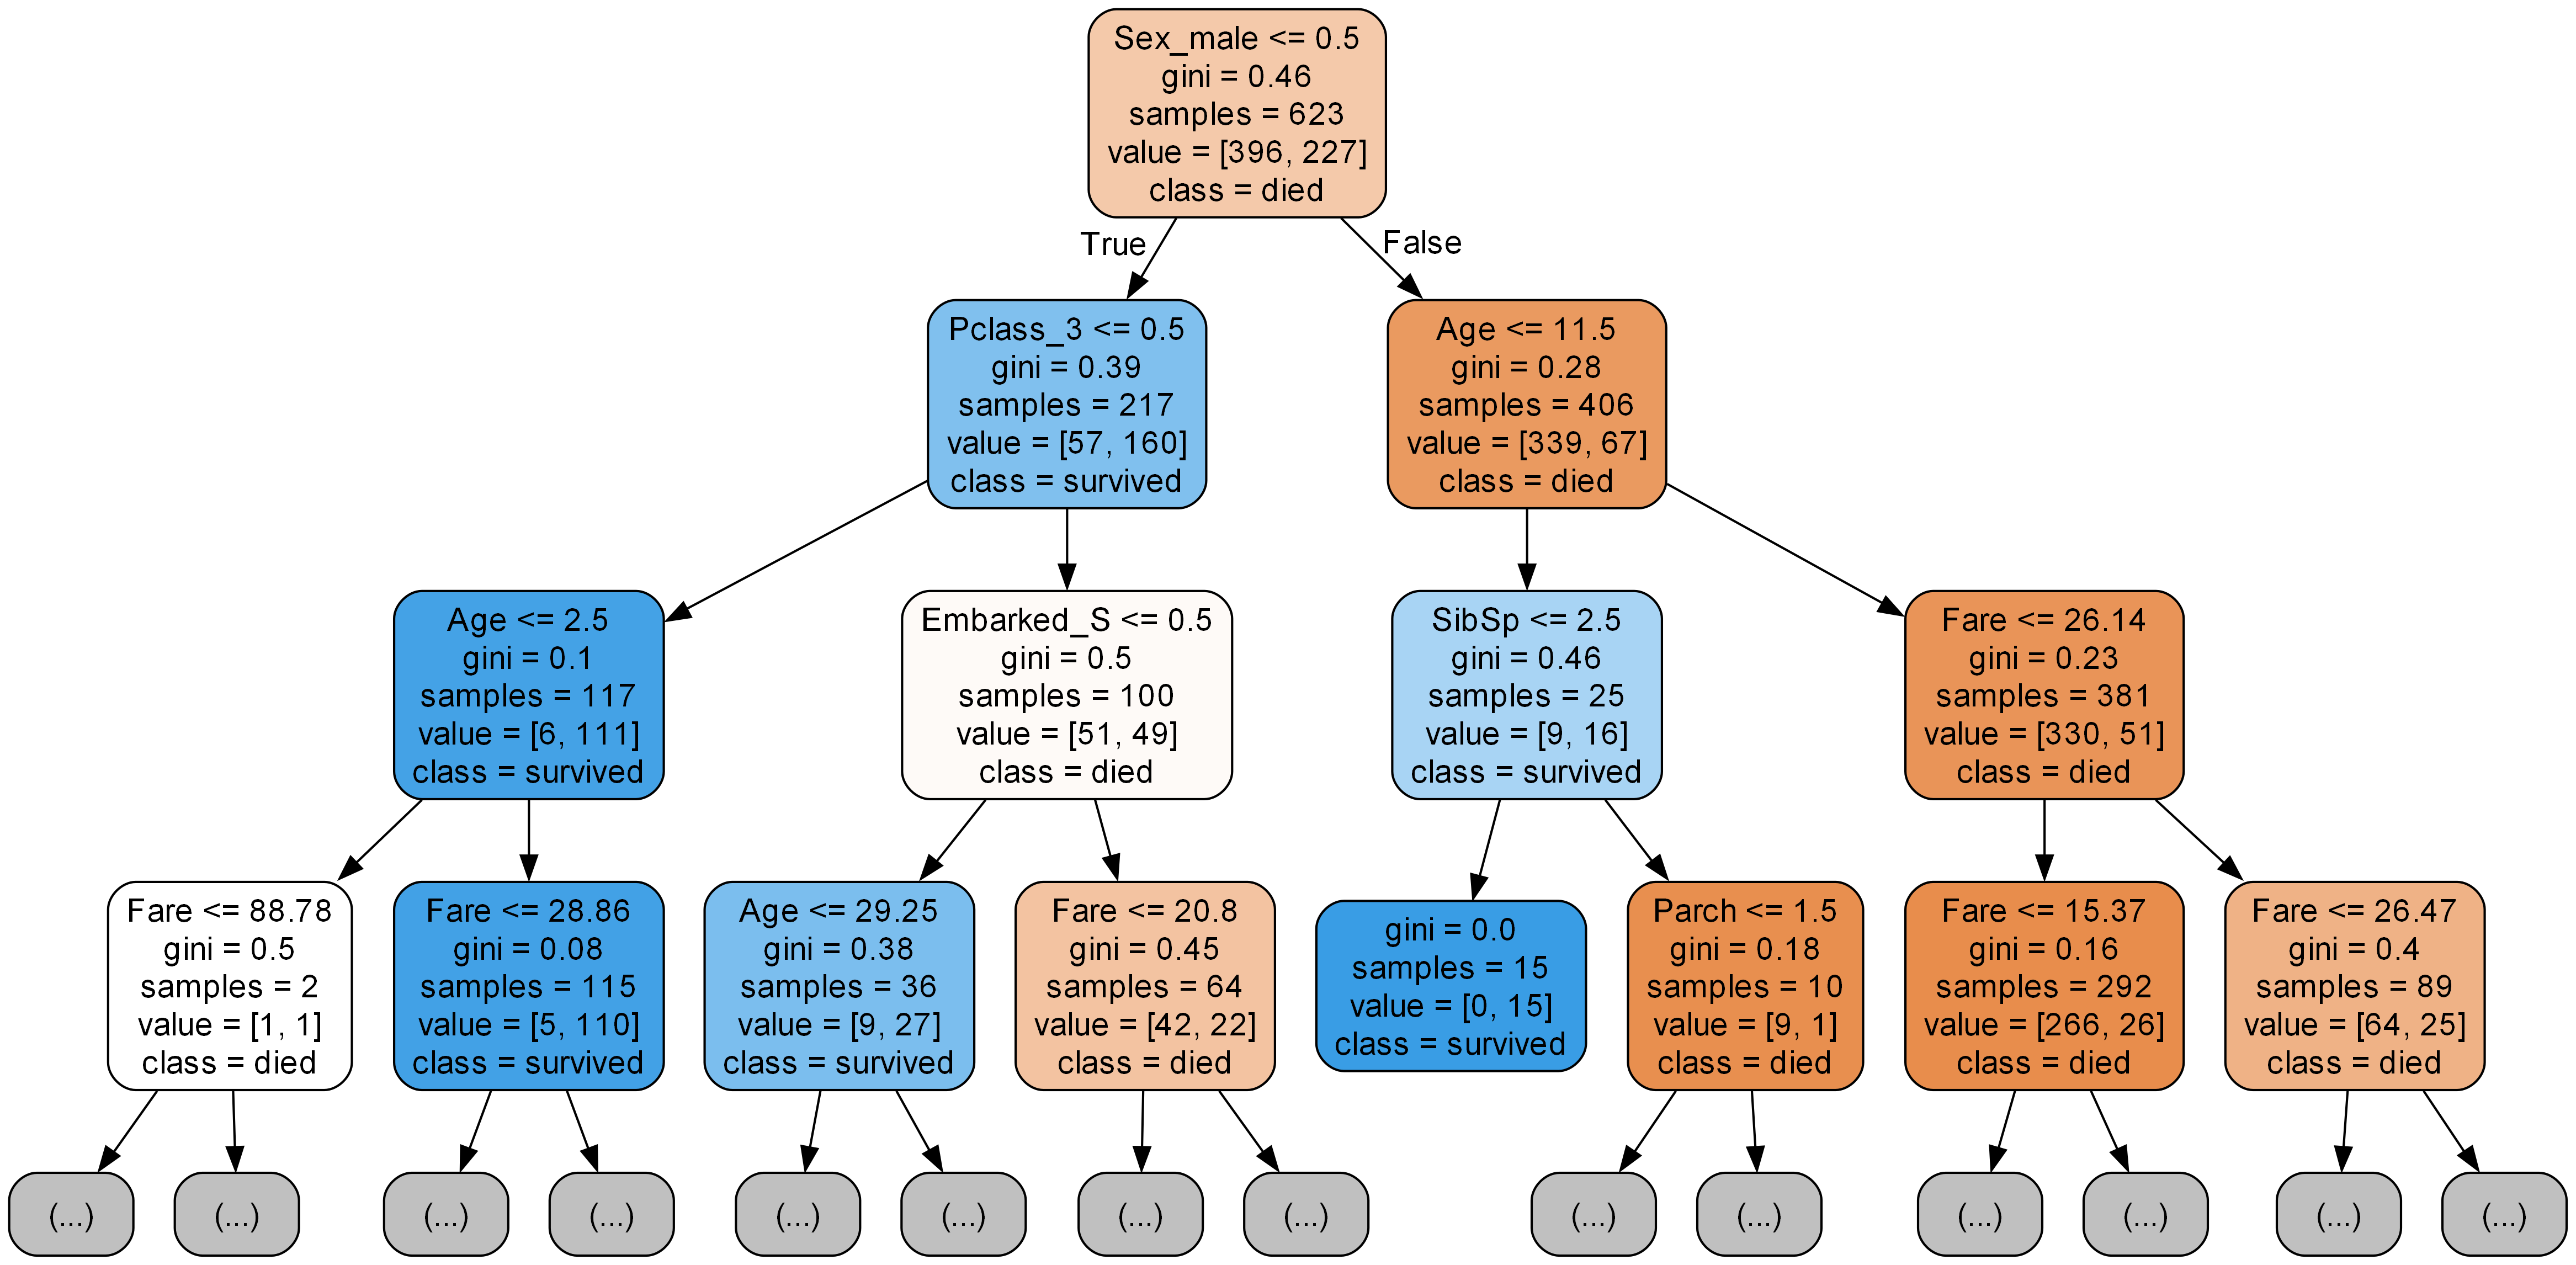

In [25]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,
                out_file='tree.dot',
                feature_names=list(x),
                class_names=['died', 'survived'],
                rounded=True,
                precision=2,
                max_depth=3,
                filled=True
                )
!dot tree.dot -Tpng -otree.png -Gdpi=300

# 이미지 파일 표시
Image(filename="tree.png")

*2) 변수 중요도 시각화*

In [26]:
print(list(x))
print(model.feature_importances_)

['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S']
[0.22903138 0.05892418 0.00967158 0.23923014 0.01567521 0.08690488
 0.33027867 0.00146473 0.02881924]


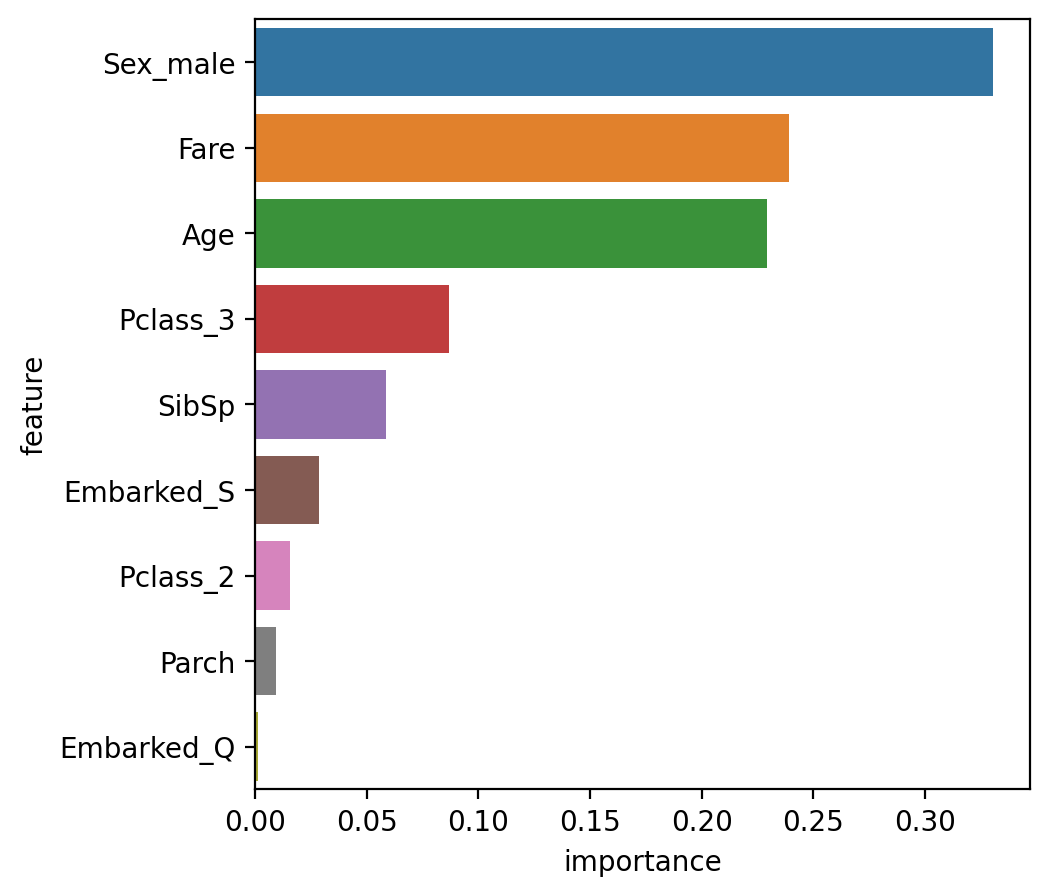

In [27]:
# 변수 중요도 시각화
perf_dic = {'feature': list(x), 'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(5, 5))
sns.barplot(x=df['importance'], y=df['feature'])
plt.show()